# Sentiment Analysis for IMDb Movies Reviews

##Imports

In [1]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import os
import joblib

In [2]:
# Download NLTK resources (run once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

## 1. Load and Preprocess Dataset


In [16]:
df = pd.read_csv("IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [17]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Split into words
    words = word_tokenize(text)
    # Remove stopwords and lemmatize
    clean_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    # Join words back together
    return ' '.join(clean_words)

# Apply cleaning to all reviews
df['cleaned_review'] = df['review'].apply(clean_text)

# Convert sentiment to numbers (1 for positive, 0 for negative)
df['sentiment'] = df['sentiment'].str.strip().str.lower().map({'positive': 1, 'negative': 0})


print("\nFirst 5 Rows:")
df.head()


First 5 Rows:


,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,1,one reviewer mentioned watching oz episode you...
1,A wonderful little production. <br /><br />The...,1,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,1,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,0,basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter matteis love time money visually stunni...


## 2. Convert Text to Numerical Format

In [18]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_review'])
y = df['sentiment']
print("\nShape of the number data:", X.shape)


Shape of the number data: (50000, 5000)


## 3. Train and Evaluate Logistic Regression


In [23]:
# Split data into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions and check accuracy
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)

print("\nLogistic Regression Accuracy:", lr_accuracy)

print("\nLogistic Regression Classification Report:")
report_dict = classification_report(y_test, lr_predictions, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
display(report_df)


Logistic Regression Accuracy: 0.8847

Logistic Regression Classification Report:


,precision,recall,f1-score,support
0,0.893877,0.870994,0.882287,4961.0000
1,0.876113,0.898194,0.887016,5039.0000
accuracy,0.884700,0.884700,0.884700,0.8847
macro avg,0.884995,0.884594,0.884652,10000.0000
weighted avg,0.884926,0.884700,0.884670,10000.0000


In [24]:
# Save the model
os.makedirs('saved_models', exist_ok=True)
joblib.dump(lr_model, 'saved_models/lr_model.pkl')
print("\nSaved Logistic Regression model as 'saved_models/lr_model.pkl'")


Saved Logistic Regression model as 'saved_models/lr_model.pkl'


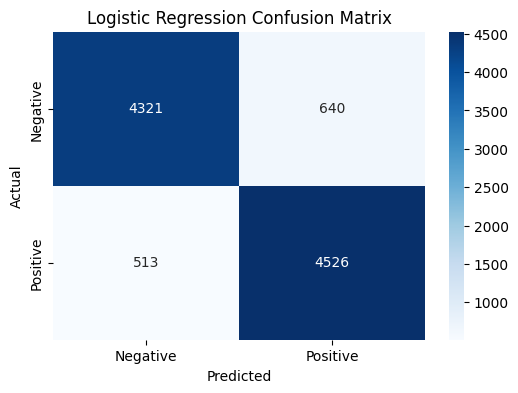

In [25]:
# Show confusion matrix
cm_lr = confusion_matrix(y_test, lr_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## 4. Train and Evaluate Naive Bayes

In [27]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

nb_predictions = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)

print("\nNaive Bayes Accuracy:", nb_accuracy)

print("\nNaive Bayes Classification Report:")
report_dict = classification_report(y_test, nb_predictions, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
display(report_df)


Naive Bayes Accuracy: 0.852

Naive Bayes Classification Report:


,precision,recall,f1-score,support
0,0.852828,0.848015,0.850414,4961.000
1,0.851194,0.855924,0.853552,5039.000
accuracy,0.852000,0.852000,0.852000,0.852
macro avg,0.852011,0.851969,0.851983,10000.000
weighted avg,0.852005,0.852000,0.851996,10000.000


In [28]:
# Save the model
joblib.dump(nb_model, 'saved_models/nb_model.pkl')
print("\nSaved Naive Bayes model as 'saved_models/nb_model.pkl'")


Saved Naive Bayes model as 'saved_models/nb_model.pkl'


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>


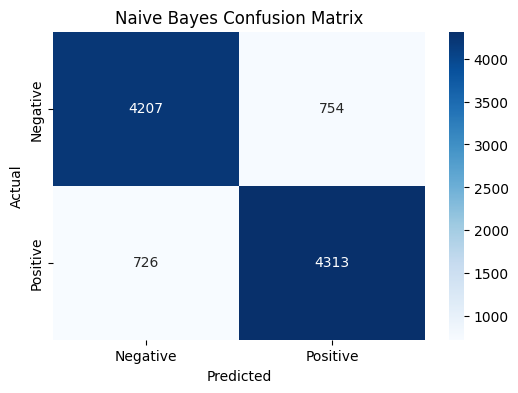

In [ ]:
# Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, nb_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(plt)

## 5. Visualize Frequent Words

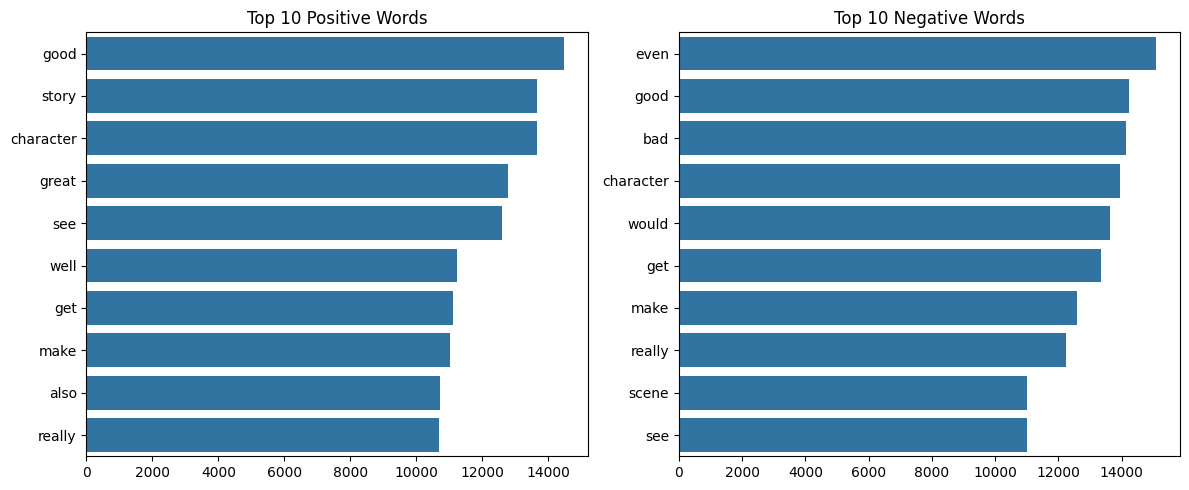


Top 10 Positive Words: [('good', 14459), ('story', 13665), ('character', 13638), ('great', 12780), ('see', 12593), ('well', 11220), ('get', 11108), ('make', 11001), ('also', 10704), ('really', 10696)]
Top 10 Negative Words: [('even', 15095), ('good', 14224), ('bad', 14132), ('character', 13961), ('would', 13647), ('get', 13347), ('make', 12593), ('really', 12255), ('scene', 11018), ('see', 10999)]


In [30]:
# 5. Visualize Frequent Words (Avoid neutral words)
neutral_words = {'movie', 'film', 'br', 'one', 'like', 'time'}
positive_reviews = df[df['sentiment'] == 1]['cleaned_review']
negative_reviews = df[df['sentiment'] == 0]['cleaned_review']
positive_words = ' '.join(positive_reviews).split()
negative_words = ' '.join(negative_reviews).split()

# Get top words, skipping neutral ones
positive_freq = [item for item in Counter(positive_words).most_common() if item[0] not in neutral_words][:10]
negative_freq = [item for item in Counter(negative_words).most_common() if item[0] not in neutral_words][:10]

# Make a plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=[count for word, count in positive_freq], y=[word for word, count in positive_freq])
plt.title('Top 10 Positive Words')
plt.subplot(1, 2, 2)
sns.barplot(x=[count for word, count in negative_freq], y=[word for word, count in negative_freq])
plt.title('Top 10 Negative Words')
plt.tight_layout()
plt.show()
print("\nTop 10 Positive Words:", positive_freq)
print("Top 10 Negative Words:", negative_freq)


## 6. Inference on New Reviews

In [31]:
new_reviews = [
    "This movie was fantastic! Great acting and an amazing plot.",
    "Terrible film, boring and poorly directed.",
    "An average movie with some good moments but overall forgettable."
]
for review in new_reviews:
    # Clean the new review
    review = review.lower()
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    words = word_tokenize(review)
    clean_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    cleaned_review = ' '.join(clean_words)

    # Convert to numbers and predict
    review_vector = vectorizer.transform([cleaned_review])
    lr_pred = lr_model.predict(review_vector)[0]
    lr_prob = lr_model.predict_proba(review_vector)[0]
    nb_pred = nb_model.predict(review_vector)[0]
    nb_prob = nb_model.predict_proba(review_vector)[0]

    print(f"\nReview: {review}")
    print(f"Logistic Regression: {'Positive' if lr_pred == 1 else 'Negative'} (Confidence: {max(lr_prob):.2f})")
    print(f"Naive Bayes: {'Positive' if nb_pred == 1 else 'Negative'} (Confidence: {max(nb_prob):.2f})")


Review: this movie was fantastic great acting and an amazing plot
Logistic Regression: Positive (Confidence: 1.00)
Naive Bayes: Positive (Confidence: 0.82)

Review: terrible film boring and poorly directed
Logistic Regression: Negative (Confidence: 1.00)
Naive Bayes: Negative (Confidence: 0.95)

Review: an average movie with some good moments but overall forgettable
Logistic Regression: Negative (Confidence: 0.79)
Naive Bayes: Negative (Confidence: 0.74)
